# Практическая работа №1: Основы анализа и моделирования социальных сетей
Выполнил студент гр. 0382 Крючков Артем. Вариант "ODD"

## Цель работы
Цель работы приводится в соответствии с указаниями к практической работе.

## Основные теоретические положения
- **Социоматрица** (*sociomatrix*) - матрица X размерности g x g, описывающая смежные узлы в сети:
$ X = {x_{ij;r}}\:\:i,j = 1, …, g$

### Алгоритм Фрюхтермана-Рейнгольда

- “Вершины - атомные частицы или небесные тела, оказывающие друг на друга силы притяжнения и отталкивани”
- Силы притяженя и отталкивани:
    
  $f_a(d) = d^2/k f_r(d) = -k^2/d$
  
  где d - расстояние между вершинами, k = $C\sqrt{area/\#V}$
    
- Температура: уменьшается линейно до 0
- Сложность: $O(\#E+(\#V)^2)$

area = W * L

G  = (V, E)

k = $\sqrt{area/\#V}$

$function \:f_a(x) = begin\: return\: x^2/k\: end;$

$function\: f_r(x) = begin \:return\: k^2/x end;$

for i = 1 to iteration do

Цикл 1: расчёт сил отталкивания

Цикл 2: расчёт сил притяжения

Цикл 3: ограничить максимальное смещенение температурой t, а затем предотвратить выход за границы окна

Снизить температуру по мере приближения компоновки к лучшей конфигурации t = cool(t)

end

**Цикл 1:** 

for v in V do

// каждая вершина имеет два вектора: .pos и .disp v.disp := 0

for u in V \ {v} do

// $\triangle$ - вектор разности между положениями двух вершин

 $\triangle = v.pos - u.pos$

$v.disp = v.disp + (\triangle /|\triangle|) * f_r(|\triangle|)$

end

end

**Цикл 2:**

for e in E do

// каждое ребро представляет собой упорядоченную пару вершин $.v\:и\: .u\: \triangle := e.v.pos - e.u.pos;$

$e.v.disp := e.v.disp - (\triangle / |\triangle|) * f_a(|\triangle|);$

$e.u.disp := e.u.disp +(\triangle / |\triangle|) * f_a(|\triangle|)$;

end

**Цикл 3:**

for v in V do

$v.pos := v.pos + (v.disp/|v.disp|)*min(v.disp, t);$

$v.pos.x := min(W/2, max(-W/2, v.pos.x));$

$v.pos.y := min(L/2, max(-L/2, v.pos.y))$

end

### Алгоритм Камада-Каваи

- **Идея**: настройка пружинной системы таким образом, чтобы минимизация энергии системы соответствовала минимизации разницы между геометрическим и графовым расстоянием
- $d_{ij}$ - кратчайшее растояние пути между вершинами i и j
- $l_{ij} = L * d_{ij}$ - идеальная длина пружины между вершинами i и j,
    
    $L = L_0/max_{i<k}d_{ij}$
    
- Сила пружины
    
    $k_{ij} = K / d^2_{ij}$
    
- Энергия:
    
    $E = \sum_{i=1}^{n-1}\sum^n_{j=i+1}1/2k_{ij}(|p_i-p_j| - l_{ij})^2$
    
- Перепишем функцию энергии

$$
E = \sum_{i=1}^{n-1}\sum^n_{j=i+1}1/2k_{ij}((x_i - x_j)^2 + (y_i - y_j)^2+l_{ij}^2-2l_{ij}\sqrt{((x_i - x_j)^2 + (y_i - y_j)^2})
$$

- Цель: вычислить значения ($x_i, y_i$), которые минизируют E
- Условия локального минимума
    
     $dE/dx_m = dE/ dy_m = 0, 1≤ m ≤$
    
- Условие выбора точки
    
    $\triangle_m = \sqrt{(dE/dx_m)^2 + (dE/ dy_m)^2}$
    

**Алгоритм Камада-Каваи**

Вычислить $d_{ij}, 1≤i≠j≤n;$

Вычислить $l_{ij}, \:1≤ i≠j ≤n;$

Вычислить $k_{ij}, 1≤ i≠j≤n;$

Инициализировать точки $p_1, p_2, …, p_n;$

$while \:max_i \triangle_i > \varepsilon$ do

Выбрать точку $p_m$ такую, что $\triangle_m = max_i \triangle_i;$

$while \:\triangle_m > \varepsilon$ do

Вычислить $\delta x$ и $\delta y$, решив следующую систему уравнений:

$\dfrac{\delta^2E}{\delta x^2_m} (x_m^{(t)}, y_m^{(t)})\delta x + \dfrac{\delta^2E}{\delta x_m \delta y_m} (x_m^{(t)}, y_m^{(t)})\delta y = - \dfrac{\delta E}{\delta x_m} (x_m^{(t)}, y_m^{(t)});$

$\dfrac{\delta^2E}{\delta y^2_m} (x_m^{(t)}, y_m^{(t)})\delta x + \dfrac{\delta^2E}{\delta y_m \delta x_m} (x_m^{(t)}, y_m^{(t)})\delta y = - \dfrac{\delta E}{\delta y_m} (x_m^{(t)}, y_m^{(t)});$

$x_m := x_m + \delta x;$

$y_m := y_m + \delta y;$

end

end

- **Размер сети** (*network size*) - количество акторов сети.
- **Плотность**(*density*) - доля имеющихся связей по отношению к максимально возможному количеству связей
    - Для ориентированный сетей:
        
        $\triangle$ = $L/A$$^2_g$
        
    - Для неориентированных сетей
        
        $\triangle$ =  $L/\binom{g}{2}$
        
- **Компонента** (*component*) - подгруппа, в которой все акторы связаны друг с другом прямо или косвенно
    

    
- **Диаметр полной сети** (*diametr*) - наибольшая длина любого из кратчайших путей между всеми парами узлов.
    


- **Тразитивность, коэф. кластеризации** (transitivity) - доля закрытых треугольников (триад где наблюдаются все три связи) по отношению к общему количеству открытых и закрытых теругольников (триад, где наблюдаются либо две, либо все три связи)

- **Степень узла** (*nodal degree)* d(ni) - число прямых, инцидентных узлу ni
    - Средняя степень узлов:
        
        $\bar d$ = 1/g $\sum _{i=1}^{g}d(n_i)$
        
    - Дисперсия степеней узлов:
        
        $S^2$= $1/g \sum^{g}_{i=1}$ $(d_i(n_i)- \bar d)^2$
        
        $S^2_I$= $1/g \sum^{g}_{i=1}$ $(d_I(n_i)- \bar d_I)^2$, I - входящее, аналогичная формула где O - исходящее
        
- **Нормированная центральность по степени**:

$$
C^`_D(n_i)=\dfrac{d(n_i)}{g-1}
$$

- **Нормированная центральность по близости**:

$$
C^`_C(n_i) = \dfrac{g-1}{\sum_{j=1}^gd(n_i, n_j)} = (g-1)C_c(n_i)
$$


- **Центральность по посредничеству**(*betweenness centrality*) характеризует, насколько важную роль данный узел играет на пути “между” парами других узлов сети, в том смысле, что пути между другими узлами должны проходить через данный узел:
    
    $$
    C_B(n_i) = \sum_{j<k}( g_{jk}(n_i)/g_{jk})
    $$
    
    где:
    
    - $g_{jk}(n_i)$ - количество геодезических расстояний между узлами j и k, которые включают узел i
    - $g_{jk}$ - геодезическое расстояние между узлами j и k

- **Центральность по информации** можно вычислить как дисперсию индексов информации актора:

$$
S_i^2=\dfrac{1}{g}(C_I^{'}(n_i)-\bar C_I)^2,
$$

где $\barС_i$ $= \sum_i C_I(n_i)$
 
- **Центральность по степени**(degree centrality) - степень каждого актора:
    
    $$
    С_D(n_i)=d(n_i)
    $$


- **Централизация по степени**:

$$
C_D = \dfrac{\sum_{i=1}^g[C_D(n^*)-C_D(n_i)]}{max\sum_{i=1}^g[C_D(n^*)-C_D(n_i)]} = \dfrac{\sum_{i=1}^g[C_D(n^*)-C_D(n_i)]}{{(g-1)(g-2)}}
$$

- В качестве **централизации по степеням** также можно использовать дисперсию:
    
    $$
    S^2_D= 1/g \sum_{i=1}^g(C^`_D(n_i)-\bar C_D)^2
    $$
    
- **Центральность по близости**(closeness centrality) - более важными узлами считаются узлы, наиболее близкие к остальным узлам сети:

$$ С_с(n_i) = (\sum_{j=1}^g d(n_i, n_j))^{-1} $$


- **Централизация по близости**:
    
$
C_С = \dfrac{\sum_{i=1}^g[C^`_C(n^*)-C_C^`(n_i)]}{(g-1)(g-2)/(2g-3)}
$
    
- В качестве **централизации по степеням** также можно использовать дисперсию:
    
    $$
    S^2_C = 1/g \sum_{i=1}^g(C^`_C(n_i)-\bar C_C)^2
    $$
    

- **Нормированный престиж** по степени:

$$
P_D^{'}(n_i)=\dfrac{x_{+i}}{g-1}
$$
    

- Престиж по близости определяется как:

$$
P_p(n_i) = \dfrac{\#I_i/(g-1)}{\sum_{j:n_j \in I_i} d(n_j, n_i)/\#I_i}
$$

где $d(n_j, n_i)$ - расстояние пути между двумя узлами

- В качестве **престижа по близости** на уровне группы используется дисперсия:

$$
S^2_P = 1/g\sum_{i=1}^g(P_P(n_i) - \bar P_p)^2,
$$

где $\bar P_P = 1/g \sum_{i=1}^g P_P(n_i)$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


### ***Пункт 1***
Из файла florentine_business.csv извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [ ]:
install.packages('igraph')


In [ ]:
install.packages('statnet')

In [ ]:
install.packages('devtools')

In [ ]:
devtools::install_github("DougLuke/UserNetR")

In [ ]:
library(statnet)
library(UserNetR)

In [181]:
df <- read.table(file='florentine_business.csv', header=TRUE, sep = ",")
sociomatrix <- as.matrix(df)
sociomatrix

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### ***Пункт 2***
Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.



In [ ]:
library(igraph)
gj <- get.data.frame(graph.adjacency(sociomatrix, mode="undirected"))
head(gj, 5)


,from,to
,<chr>,<chr>
1,Barbadori,Castellani
2,Barbadori,Ginori
3,Barbadori,Medici
4,Barbadori,Peruzzi
5,Bischeri,Guadagni


### ***Пункт 3***
Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).

In [ ]:
rownames(sociomatrix) <- colnames(sociomatrix)
sociomatrix

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### ***Пункт 4***
С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

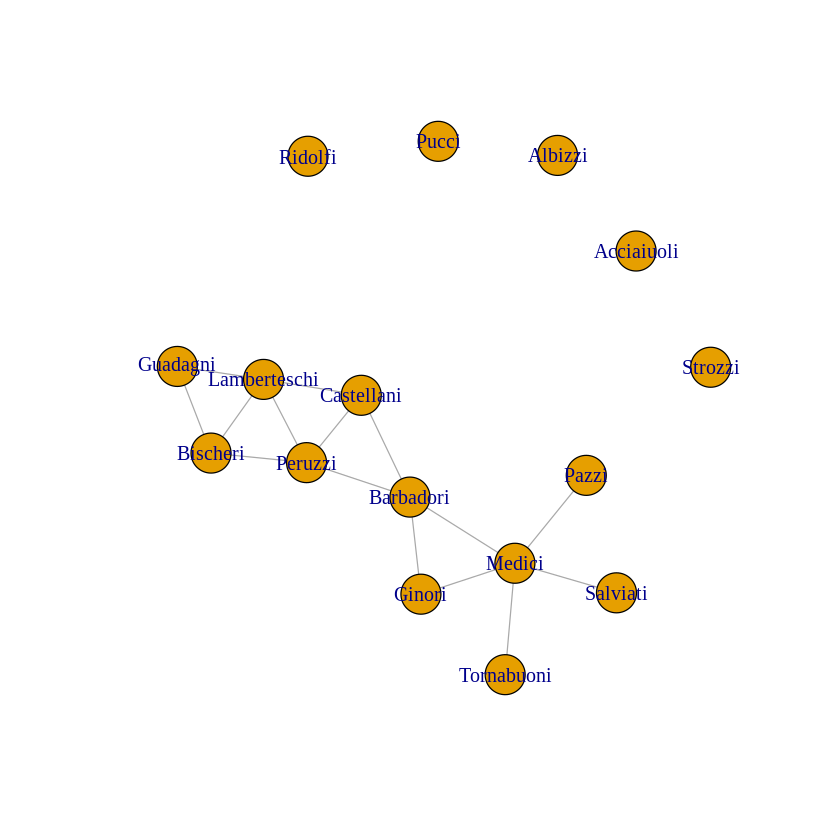

In [ ]:
g <- graph_from_adjacency_matrix(sociomatrix, mode = "undirected")
plot(g)

Парметры:
- sociomatrix - **социоматрица**, по которой строится граф
- mode - тип графа(в данном случае ненаправленный)


### ***Пункт 5***
Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

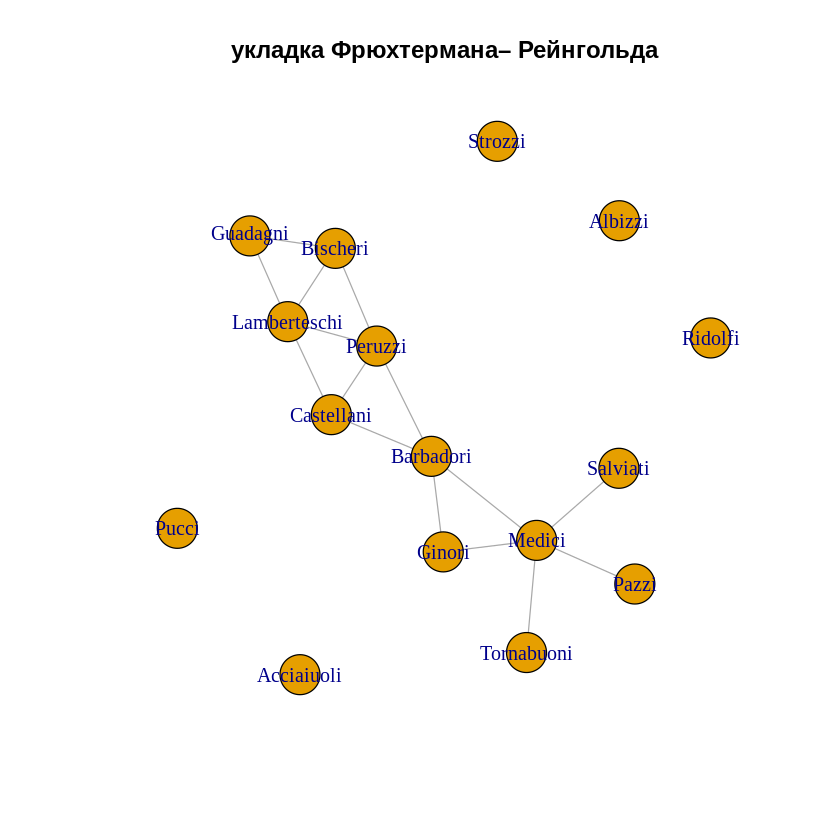

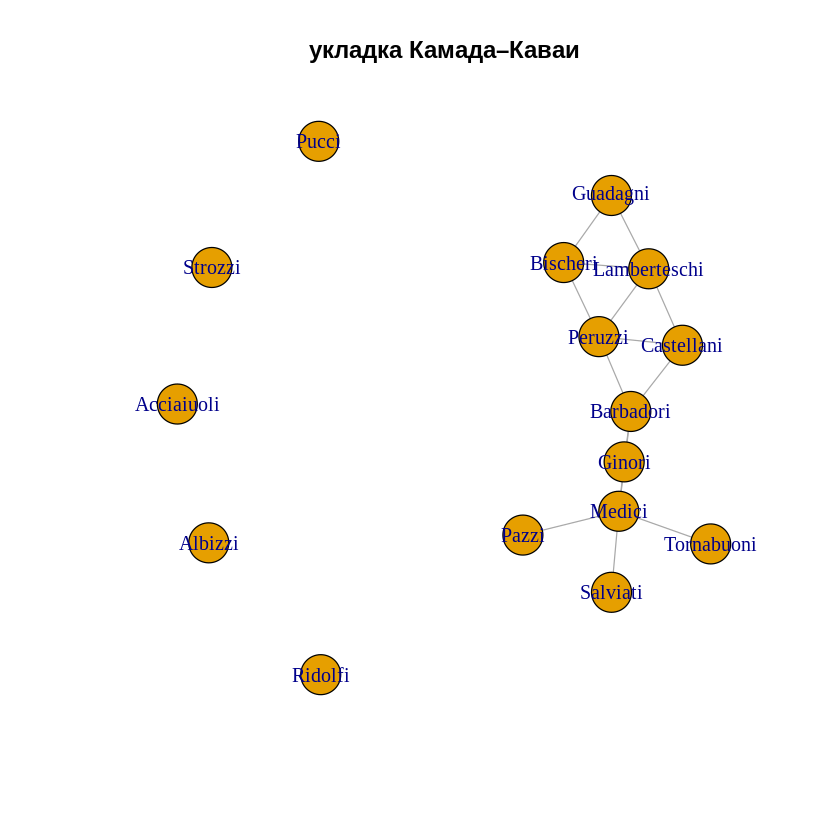

In [ ]:
plot(g, layout=layout_with_fr, main="укладка Фрюхтермана– Рейнгольда")
plot(g, layout=layout_with_kk, main='укладка Камада–Каваи')

С практической точки зрения алгоритм Фрюхтермана–Рейнгольда оказался лучше, т.к. видна триада Barbadori, Ginori, Medici. 

Разница в алгоритмах заключается в том, что алгоритм Фрюхтермана–Рейнгольда итеративно применяет силы, а алгоритм Камада–Каваи итеративно формирует функции энергии и находит ее минимум. Сходство заключается в том, что оба алгоритма силовые.

### ***Пункт 6***
Вывести «описательную сводку» сети.

In [ ]:
summary(g)

IGRAPH c2fee11 UN-- 16 15 -- 
+ attr: name (v/c)


### ***Пункт 7***
 Вычислить «пятичисловую сводку» сети:
  - (a) Вычислить размер сети.
  - (b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
  - (c) Определить число компонент в сети по графику. Подтвердить
  свои догадки с помощью соответствующей функции. Сделать
  выводы.
  - (d) Вычислить диаметр сети. Сделать выводы
  - (e) Вычислить коэффициент кластеризации. Сделать выводы.

In [ ]:
five_number_summary = list()
# размер сети
five_number_summary <- append(five_number_summary, gsize(g))

# Плотность

edge_density <- gsize(g) / choose(gorder(g), 2)

five_number_summary <- append(five_number_summary, paste(toString(edge_density), toString(edge_density(g), sep=" "))) # Вывод: плотности равны

# Чисо компонент в сети
five_number_summary <- append(five_number_summary, count_components(g)) # Вывод: Число компонент совпадает

# Диаметр сети
five_number_summary <- append(five_number_summary, diameter(g)) # Вывод: Диаметр сети равен 5. Акторы(люди) отделены связью максимум в 4 человека

# Коэффициент кластеризации
five_number_summary <- append(five_number_summary, transitivity(g)) # Вывод: коэффициент кластеризации равен 0.416666666666667, т.е. *вероятность* транизтивности больше 40%
five_number_summary

[[1]]
[1] 15

[[2]]
[1] "0.125 0.125"

[[3]]
[1] 6

[[4]]
[1] 5

[[5]]
[1] 0.4166667

### ***Пункт 8***
Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [ ]:
average_degree <- sum(igraph::degree(g))/gorder(g)
dispersion <- var(igraph::degree(g))
average_degree
dispersion

[1] 1.875

[1] 3.05

In [ ]:
Дисперсия больше 3, значит количество связей у акторов неравномерно.

Acciaiuoli      Albizzi    Barbadori     Bischeri   Castellani       Ginori 
           0            0            4            3            3            2 
    Guadagni Lamberteschi       Medici        Pazzi      Peruzzi        Pucci 
           2            4            5            1            4            0 
     Ridolfi     Salviati      Strozzi   Tornabuoni 
           0            1            0            1

Средняя степень узлов: 1.875
Дисперсия: 1.7 

### ***Пункт 9***
Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин:

In [209]:
Isolated = which(igraph::degree(g)==0)
g_without_isolated = delete_vertices(g, Isolated)
match(V(g_without_isolated)$name, V(g)$name)
igraph::degree(g_without_isolated, normalized =  TRUE)
igraph::closeness(g_without_isolated, normalized = TRUE)
igraph::betweenness(g_without_isolated, normalized = TRUE)
i <- infocent(network::delete.vertices(network(sociomatrix), isolates(network(sociomatrix))))
i / sum(i)


[1]  3  4  5  6  7  8  9 10 11 14 16

Barbadori     Bischeri   Castellani       Ginori     Guadagni Lamberteschi 
         0.4          0.3          0.3          0.2          0.2          0.4 
      Medici        Pazzi      Peruzzi     Salviati   Tornabuoni 
         0.5          0.1          0.4          0.1          0.1

Barbadori     Bischeri   Castellani       Ginori     Guadagni Lamberteschi 
   0.5882353    0.4000000    0.5000000    0.4545455    0.3125000    0.4166667 
      Medici        Pazzi      Peruzzi     Salviati   Tornabuoni 
   0.5263158    0.3571429    0.5263158    0.3571429    0.3571429

Barbadori     Bischeri   Castellani       Ginori     Guadagni Lamberteschi 
  0.55555556   0.05555556   0.11111111   0.00000000   0.00000000   0.13333333 
      Medici        Pazzi      Peruzzi     Salviati   Tornabuoni 
  0.53333333   0.00000000   0.30000000   0.00000000   0.00000000

[1] 0.12446815 0.08898359 0.10457651 0.09531249 0.07656303 0.09837087
 [7] 0.11089878 0.06388631 0.10916767 0.06388631 0.06388631

|    $n_i$ |    $C'_D$ |       $C'_C$ |         $C'_B$ |         $C'_I$ |
|------:|------:|----------:|-----------:|-----------:|
| <int> | <dbl> |     <dbl> |      <dbl> |      <dbl> |
|     3 |   0.4 | 0.5882353 | 0.55555556 | 0.12446815 |
|     4 |   0.3 | 0.4000000 | 0.05555556 | 0.08898359 |
|     5 |   0.3 | 0.5000000 | 0.11111111 | 0.10457651 |
|     6 |   0.2 | 0.4545455 | 0.00000000 | 0.09531249 |
|     7 |   0.2 | 0.3125000 | 0.00000000 | 0.07656303 |
|     8 |   0.4 | 0.4166667 | 0.13333333 | 0.09837087 |
|     9 |   0.5 | 0.5263158 | 0.53333333 | 0.11089878 |
|    10 |   0.1 | 0.3571429 | 0.00000000 | 0.06388631 |
|    11 |   0.4 | 0.5263158 | 0.30000000 | 0.10916767 |
|    14 |   0.1 | 0.3571429 | 0.00000000 | 0.06388631 |
|    16 |   0.1 | 0.3571429 | 0.00000000 | 0.06388631 |


Самый важный актор под индексом 3. Однако, всё не очень однозначно для меры центральности по информации, поэтому полезно рассматривать важность каждого актора по каждой мере.

### ***Пункт 10***
Вычислить значение централизации для каждой меры. Сделать выводы.

In [175]:
centr_degree(g_without_isolated)$centralization
centr_clo(g_without_isolated)$centralization
centr_betw(g_without_isolated)$centralization
centralization(network::delete.vertices(network(sociomatrix), isolates(network(sociomatrix))), infocent)

[1] 0.2272727

[1] 0.3535226

[1] 0.4422222

[1] 0.1663254

### ***Пункт 11***
Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте
их самостоятельно). Построить график сети, на котором выделены
точки сочленения и мосты.

+ 2/16 vertices, named, from 15025b8:
[1] Medici    Barbadori

+ 3/15 edges from 15025b8 (vertex names):
[1] Medici--Pazzi      Medici--Salviati   Medici--Tornabuoni

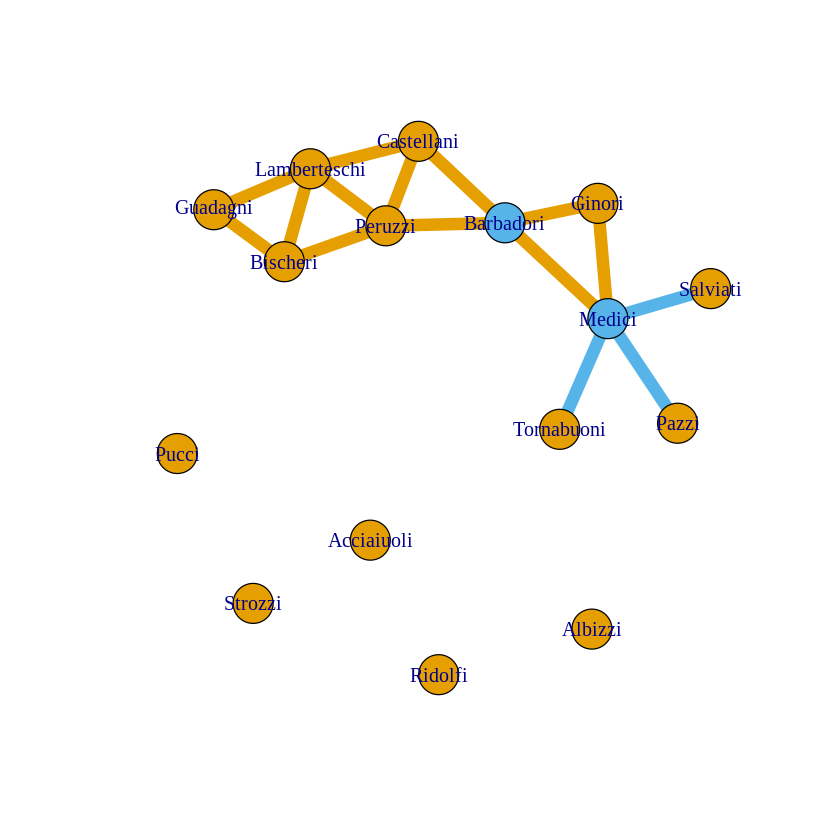

In [173]:
# Точки сочленения
articulation_points(g)
# Мосты
bridges(g)
plot(g, vertex.color = ifelse(V(g) %in% articulation_points(g), 10, 1), edge.color = ifelse(V(g) %in% bridges(g), 10, 1), edge.width = 10)


### ***Пункт 12***
Выполнить пп. 2–8 для направленной сети из файла krackhardt_advice.csv


#### 1

In [ ]:
df12 <- read.table(file='krackhardt_advice.csv', sep = ",")
sociomatrix12 <- as.matrix(df12)
sociomatrix12

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


#### 2

In [ ]:
gj12 <- get.data.frame(graph.adjacency(sociomatrix12, mode="directed"))
head(gj12, 5)

,from,to
,<chr>,<chr>
1,V1,V2
2,V1,V4
3,V1,V8
4,V1,V16
5,V1,V18


#### 3

In [ ]:
rownames(sociomatrix12) <- colnames(sociomatrix12)
sociomatrix12

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
V2,0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V3,1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
V4,1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
V5,1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
V6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V7,0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
V8,0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
V9,1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
V10,1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


#### 4

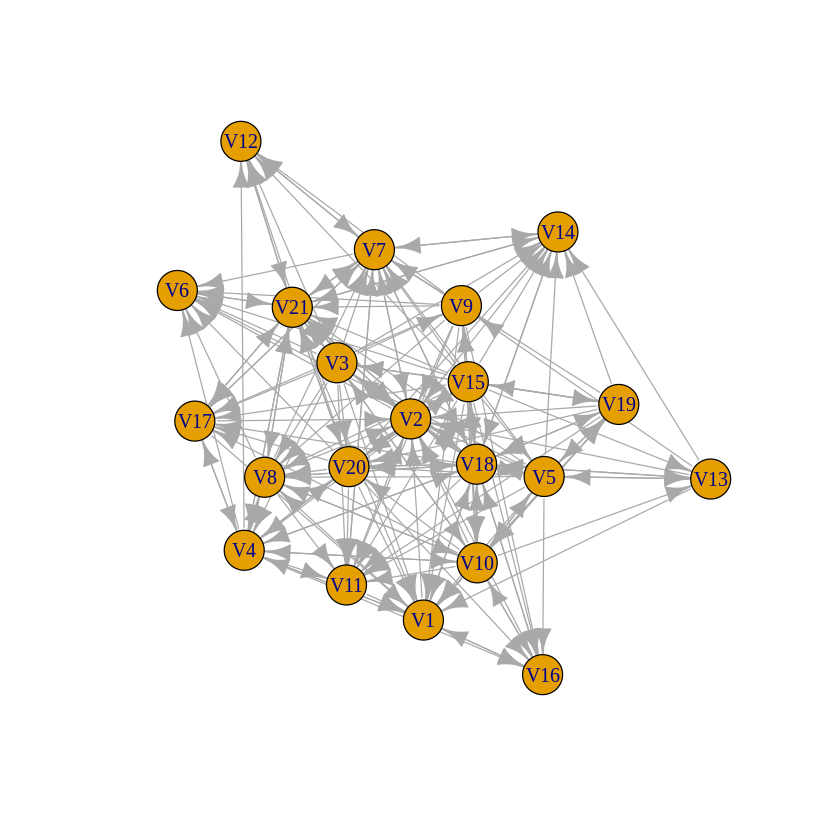

In [ ]:
g12 <- graph_from_adjacency_matrix(sociomatrix12, mode = "directed")
plot(g12)

#### 5

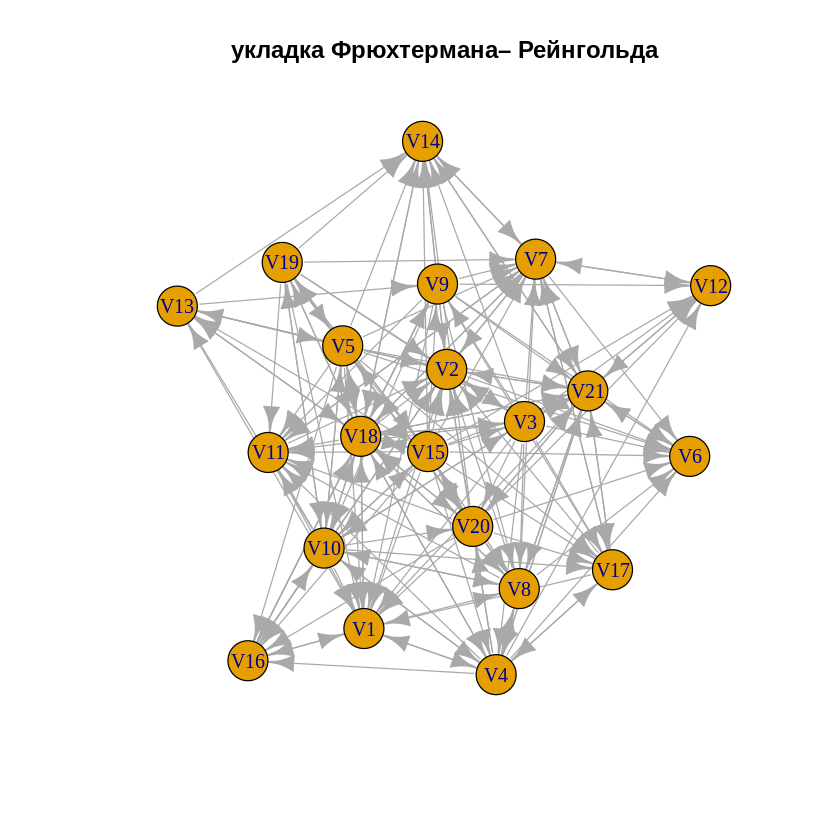

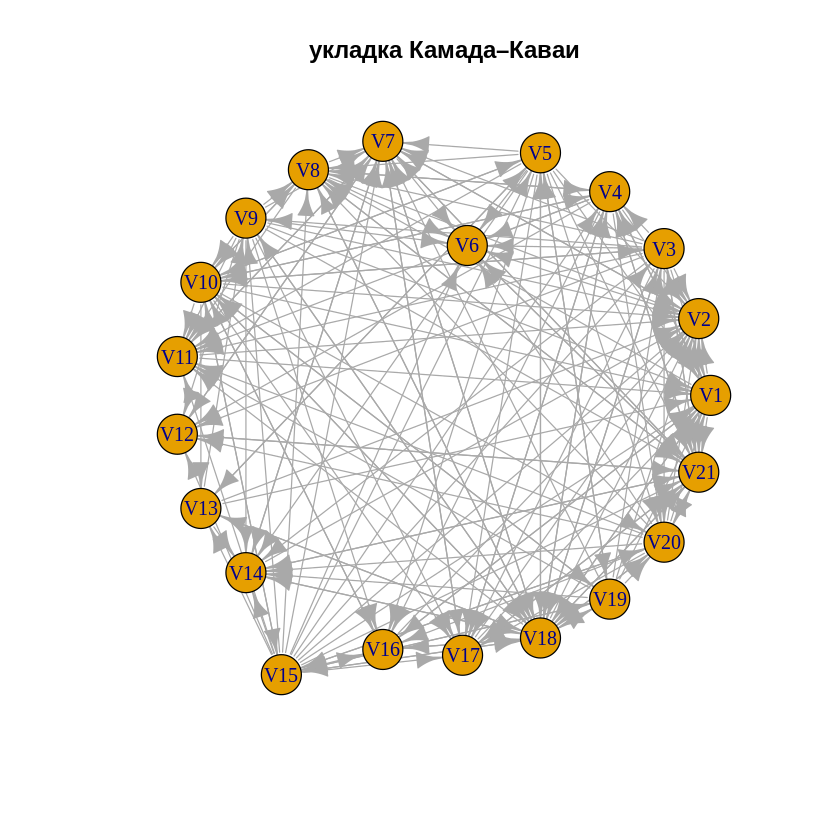

In [ ]:
plot(g12, layout=layout_with_fr, main="укладка Фрюхтермана– Рейнгольда")
plot(g12, layout=layout_with_kk, main='укладка Камада–Каваи')

#### 6

In [ ]:
summary(g12,)

IGRAPH e76bea3 DN-- 21 190 -- 
+ attr: name (v/c)


#### 7

In [ ]:
five_number_summary12 = list()
# размер сети
five_number_summary12 <- append(five_number_summary12, gsize(g12))

# Плотность
edge_density12 <- gsize(g12) / choose(gorder(g12),2) / factorial(2)

five_number_summary12 <- append(five_number_summary12, paste(toString(edge_density12), toString(edge_density(g12), sep=" "))) # Вывод: плотности равны

# Чисо компонент в сети
five_number_summary12 <- append(five_number_summary12, count_components(g12)) # Вывод: Число компонент совпадает

# Диаметр сети
five_number_summary12 <- append(five_number_summary12, diameter(g12)) # Вывод: Диаметр сети равен 3

# Коэффициент кластеризации
five_number_summary12 <- append(five_number_summary12, transitivity(g12)) # Вывод: коэффициент кластеризации равен 0.734508816120907
five_number_summary12

[[1]]
[1] 190

[[2]]
[1] "0.452380952380952 0.452380952380952"

[[3]]
[1] 1

[[4]]
[1] 3

[[5]]
[1] 0.7345088

#### 8

In [ ]:
# In
print("In:")
average_degree_I <- sum(igraph::degree(g12, mode="in"))/gorder(g12)
dispersion_I <- (sum((igraph::degree(g12, mode="in")-average_degree_I)**2)/gorder(g12))**0.5
average_degree_I
dispersion_I

# Out
print("Out:")
average_degree_O <- sum(igraph::degree(g12, mode="out"))/gorder(g12)
dispersion_O <- (sum((igraph::degree(g12, mode="out")-average_degree_O)**2)/gorder(g12))**0.5
average_degree_O
dispersion_O

[1] "In:"


[1] 9.047619

[1] 3.969841

[1] "Out:"


[1] 9.047619

[1] 5.322693

### Пункт 13
Заполнить таблицу для различных мер престижа:

In [210]:
prestige(network(sociomatrix), cmode = "indegree")/(gorder(g)-1) 

[1] 0.00000000 0.00000000 0.26666667 0.20000000 0.20000000 0.13333333
 [7] 0.13333333 0.26666667 0.33333333 0.06666667 0.26666667 0.00000000
[13] 0.00000000 0.06666667 0.00000000 0.06666667

|   $n_i$  |     $P_d$     |   |   |   |
|:-----:|:----------:|---|---|---|
| <int> |    <dbl>   |   |   |   |
|     1 | 0.00000000 |   |   |   |
|     2 | 0.00000000 |   |   |   |
|     3 | 0.26666667 |   |   |   |
|     4 | 0.20000000 |   |   |   |
|     5 | 0.20000000 |   |   |   |
|     6 | 0.13333333 |   |   |   |
|     7 | 0.13333333 |   |   |   |
|     8 | 0.26666667 |   |   |   |
|     9 | 0.33333333 |   |   |   |
|    10 | 0.06666667 |   |   |   |
|    11 | 0.26666667 |   |   |   |
|    12 | 0.00000000 |   |   |   |
|    13 | 0.00000000 |   |   |   |
|    14 | 0.06666667 |   |   |   |
|    15 | 0.00000000 |   |   |   |
|    16 | 0.06666667 |   |   |   |

## Выводы

Было произведено изучение работы с данными, построение графов на основе данных и анализа графов на основе изученных методов.